In [1]:

import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
playerplay = pd.read_csv('player_play.csv')
df = pd.read_csv('tracking_week_1.csv')

In [3]:
cols = ['gameId','playId', 'possessionTeam','defensiveTeam','quarter', 'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment','passResult','playAction', 'timeToThrow','pff_passCoverage','pff_manZone']

In [4]:
filteredplays = plays.loc[plays['passResult'].notna(), cols]


In [5]:
filteredplays[(filteredplays.gameId == 2022090800) & (filteredplays.playId == 56)]

,gameId,playId,possessionTeam,defensiveTeam,quarter,down,yardsToGo,offenseFormation,receiverAlignment,passResult,playAction,timeToThrow,pff_passCoverage,pff_manZone
13368,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,False,2.169,Cover 6-Left,Zone


In [6]:
filteredplays

,gameId,playId,possessionTeam,defensiveTeam,quarter,down,yardsToGo,offenseFormation,receiverAlignment,passResult,playAction,timeToThrow,pff_passCoverage,pff_manZone
0,2022102302,2655,CIN,ATL,3,1,10,EMPTY,3x2,C,False,2.990,Cover-3,Zone
1,2022091809,3698,CIN,DAL,4,1,10,EMPTY,3x2,C,False,1.836,Quarters,Zone
2,2022103004,3146,HOU,TEN,4,3,12,SHOTGUN,2x2,C,False,2.236,Quarters,Zone
3,2022110610,348,KC,TEN,1,2,10,SHOTGUN,2x2,C,False,2.202,Quarters,Zone
8,2022091104,3662,PHI,DET,4,3,12,SHOTGUN,3x1,I,False,1.568,Cover-0,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,2022100901,2213,PIT,BUF,3,1,10,I_FORM,2x1,C,True,3.838,Quarters,Zone
16119,2022110604,1051,JAX,LV,2,3,4,SHOTGUN,2x2,I,False,1.860,Cover-2,Zone
16120,2022103005,3492,MIN,ARI,4,1,10,SHOTGUN,2x2,I,False,3.136,Cover-3,Zone
16121,2022092502,2337,KC,IND,3,1,10,SHOTGUN,2x2,R,False,NaN,Quarters,Zone


In [7]:
cols2 = ['gameId', 'playId', 'nflId','teamAbbr','inMotionAtBallSnap', 'motionSinceLineset', 'routeRan', 'hadPassReception', 'receivingYards']

In [8]:
filteredplayerplay = playerplay[cols2][playerplay['routeRan'].notna()]

In [9]:
filteredplayerplay

,gameId,playId,nflId,teamAbbr,inMotionAtBallSnap,motionSinceLineset,routeRan,hadPassReception,receivingYards
2,2022090800,56,42489,BUF,False,True,IN,1,6
4,2022090800,56,44985,BUF,False,False,OUT,0,0
7,2022090800,56,47879,BUF,False,False,IN,0,0
9,2022090800,56,52536,BUF,False,False,GO,0,0
68,2022090800,122,42489,BUF,False,False,GO,0,0
...,...,...,...,...,...,...,...,...,...
354522,2022110700,3480,44879,NO,False,False,FLAT,0,0
354523,2022110700,3480,46160,NO,False,False,IN,0,0
354526,2022110700,3480,52942,NO,False,False,OUT,1,41
354527,2022110700,3480,53098,NO,False,False,IN,0,0


In [10]:
merged_playerplay = pd.merge(
    filteredplays[['gameId','playId','possessionTeam','defensiveTeam','quarter','down','yardsToGo','offenseFormation','receiverAlignment','passResult','playAction','timeToThrow','pff_passCoverage','pff_manZone']],
    filteredplayerplay[['gameId','playId','nflId','inMotionAtBallSnap','motionSinceLineset','routeRan','hadPassReception','receivingYards']],
    how='right',
    left_on=['gameId', 'playId'],
    right_on=['gameId', 'playId']
)

In [11]:
merged_playerplay

,gameId,playId,possessionTeam,defensiveTeam,quarter,down,yardsToGo,offenseFormation,receiverAlignment,passResult,playAction,timeToThrow,pff_passCoverage,pff_manZone,nflId,inMotionAtBallSnap,motionSinceLineset,routeRan,hadPassReception,receivingYards
0,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,False,2.169,Cover 6-Left,Zone,42489,False,True,IN,1,6
1,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,False,2.169,Cover 6-Left,Zone,44985,False,False,OUT,0,0
2,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,False,2.169,Cover 6-Left,Zone,47879,False,False,IN,0,0
3,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,False,2.169,Cover 6-Left,Zone,52536,False,False,GO,0,0
4,2022090800,122,BUF,LA,1,2,3,SHOTGUN,2x1,C,False,2.903,Cover-3,Zone,42489,False,False,GO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42774,2022110700,3480,NO,BAL,4,2,10,SHOTGUN,2x2,C,False,2.390,Cover-3,Zone,44879,False,False,FLAT,0,0
42775,2022110700,3480,NO,BAL,4,2,10,SHOTGUN,2x2,C,False,2.390,Cover-3,Zone,46160,False,False,IN,0,0
42776,2022110700,3480,NO,BAL,4,2,10,SHOTGUN,2x2,C,False,2.390,Cover-3,Zone,52942,False,False,OUT,1,41
42777,2022110700,3480,NO,BAL,4,2,10,SHOTGUN,2x2,C,False,2.390,Cover-3,Zone,53098,False,False,IN,0,0


In [12]:
tracking_data = pd.read_csv('tracking_week_1.csv')

In [13]:
tracking = tracking_data[tracking_data['frameType'] == 'AFTER_SNAP']

In [14]:
route_runners = playerplay[playerplay['routeRan'].notna()][['gameId', 'playId', 'nflId', 'routeRan']]
defenders = playerplay[playerplay['pff_primaryDefensiveCoverageMatchupNflId'].notna()][['gameId', 'playId', 'nflId', 'pff_primaryDefensiveCoverageMatchupNflId']]
defenders = defenders.rename(columns={'pff_primaryDefensiveCoverageMatchupNflId': 'routeRunnerId'})

In [15]:
merged_df = defenders.merge(route_runners, left_on=['gameId', 'playId', 'routeRunnerId'], right_on=['gameId', 'playId', 'nflId'])

In [16]:
defenders = merged_df[['gameId','playId','nflId_x','routeRunnerId']]

In [17]:
route = pd.merge(
    tracking[['gameId', 'playId', 'nflId', 'frameId', 'time', 'x', 'y']],  # Columns to keep from tracking_df
    route_runners[['gameId', 'playId', 'nflId']],  # Only keep necessary columns from route_runners_df
    on=['gameId', 'playId', 'nflId'],  # Merge on these columns
    how='inner'  # Use an inner join to keep only matching nflIds
)

In [18]:
defend = pd.merge(
    tracking[['gameId', 'playId', 'nflId', 'frameId','time', 'x', 'y']],  # Columns to keep from tracking_df
    defenders[['gameId', 'playId', 'nflId_x', 'routeRunnerId']],  # Necessary columns from defenders_df
    left_on=['gameId', 'playId', 'nflId'],  # Merge on these columns
    right_on=['gameId', 'playId', 'nflId_x'],  # Use nflId_x for the defenders DataFrame
    how='inner'  # Use an inner join to keep only matching nflIds
)


In [19]:
merged_df = pd.merge(
    route,  # Use the entire route_df
    defend[['gameId','playId','nflId','frameId','x','y','routeRunnerId']],  # Use the entire defend_df
    how='inner',  # Use an inner join to keep only matching rows
    left_on=['gameId', 'playId', 'nflId', 'frameId'],  # Merge on these columns in route_df
    right_on=['gameId', 'playId', 'routeRunnerId', 'frameId']  # Match nflId in route_df with routeRunnerId in defend_df
)

In [20]:
merged_df['time_since_snap'] = 0.1

In [21]:
def calculate_time_since_snap(df):
    time = 0.1  # Default time
    lasttime = 0.1
    
    # Initialize last identifiers
    lastgame = None
    lastplay = None
    lastplayer = None
    lastframe = None
    
    # Iterate through each row in the DataFrame
    for i in range(len(df)):
        current_row = df.iloc[i]
        
        # Check if we're still in the same game, play, and player
        if (current_row['gameId'] == lastgame and
                current_row['playId'] == lastplay and
                current_row['nflId_x'] == lastplayer):
            if current_row['frameId'] == lastframe:
                df.at[i, 'time_since_snap'] = lasttime
            elif current_row['frameId'] == lastframe + 1:
                lasttime += 0.1
                df.at[i, 'time_since_snap'] = lasttime
            else:
                # Reset time since snap if frameId is not consecutive
                lasttime = 0.1
                df.at[i, 'time_since_snap'] = lasttime
        else:
            # If gameId, playId, or nflId_x changes, reset
            df.at[i, 'time_since_snap'] = time
            lasttime = time  # Reset lasttime to default

        # Update last identifiers
        lastgame = current_row['gameId']
        lastplay = current_row['playId']
        lastplayer = current_row['nflId_x']
        lastframe = current_row['frameId']

    return df

In [22]:
merged_df = calculate_time_since_snap(merged_df)

In [23]:
merged_df

,gameId,playId,nflId_x,frameId,time,x_x,y_x,nflId_y,x_y,y_y,routeRunnerId,time_since_snap
0,2022091200,85,40026.0,118,2022-09-13 00:16:52.2,39.24,34.29,35459.0,54.43,34.34,40026.0,0.1
1,2022091200,85,40026.0,118,2022-09-13 00:16:52.2,39.24,34.29,42929.0,44.44,30.18,40026.0,0.1
2,2022091200,85,40026.0,119,2022-09-13 00:16:52.3,39.32,34.27,35459.0,54.52,34.35,40026.0,0.2
3,2022091200,85,40026.0,119,2022-09-13 00:16:52.3,39.32,34.27,42929.0,44.45,30.22,40026.0,0.2
4,2022091200,85,40026.0,120,2022-09-13 00:16:52.4,39.45,34.25,35459.0,54.62,34.35,40026.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
278883,2022090800,3696,53678.0,171,2022-09-09 03:07:37.7,3.01,50.29,54488.0,7.11,49.36,53678.0,4.9
278884,2022090800,3696,53678.0,172,2022-09-09 03:07:37.8,2.71,50.21,54488.0,7.03,49.24,53678.0,5.0
278885,2022090800,3696,53678.0,173,2022-09-09 03:07:37.9,2.43,50.12,54488.0,6.96,49.12,53678.0,5.1
278886,2022090800,3696,53678.0,174,2022-09-09 03:07:38,2.17,50.02,54488.0,6.89,49.00,53678.0,5.2


In [24]:
merge = pd.merge(
    merged_df,
    plays[['gameId', 'playId', 'timeToThrow']],
    how='left',
    left_on=['gameId', 'playId'],  
    right_on=['gameId', 'playId']  
)

In [25]:
merge = merge[(merge['time_since_snap'] <= merge['timeToThrow']) & (merge['time_since_snap'] >= 1)]

In [26]:
final = merge[['gameId', 'playId', 'frameId', 'nflId_x', 'nflId_y', 'x_x', 'y_x', 'x_y', 'y_y', 'time_since_snap', 'timeToThrow']]

In [27]:
final.rename(columns={
    'nflId_x': 'nflId_runner',
    'nflId_y': 'nflId_defender',
    'x_x': 'x_runner', 
    'y_x': 'y_runner', 
    'x_y': 'x_defender',
    'y_y': 'y_defender'
}, inplace=True)

/var/folders/rh/5hh6kw1x191g30wf_hfx_b6c0000gn/T/ipykernel_7114/911467374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.rename(columns={


In [28]:
final['separation'] = ((final['x_runner'] - final['x_defender'])**2 + (final['y_runner'] - final['y_defender'])**2)**0.5

/var/folders/rh/5hh6kw1x191g30wf_hfx_b6c0000gn/T/ipykernel_7114/3475080978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['separation'] = ((final['x_runner'] - final['x_defender'])**2 + (final['y_runner'] - final['y_defender'])**2)**0.5


In [29]:
final

,gameId,playId,frameId,nflId_runner,nflId_defender,x_runner,y_runner,x_defender,y_defender,time_since_snap,timeToThrow,separation
20,2022091200,85,128,40026.0,35459.0,42.41,33.71,56.00,34.50,1.1,2.069,13.612942
21,2022091200,85,128,40026.0,42929.0,42.41,33.71,45.11,31.30,1.1,2.069,3.619130
22,2022091200,85,129,40026.0,35459.0,43.00,33.65,56.28,34.55,1.2,2.069,13.310462
23,2022091200,85,129,40026.0,42929.0,43.00,33.65,45.23,31.47,1.2,2.069,3.118541
24,2022091200,85,130,40026.0,35459.0,43.62,33.60,56.57,34.61,1.3,2.069,12.989326
...,...,...,...,...,...,...,...,...,...,...,...,...
278855,2022090800,3696,143,53678.0,54488.0,20.23,46.00,16.82,46.89,2.1,2.569,3.524230
278856,2022090800,3696,144,53678.0,54488.0,19.56,46.32,16.40,47.09,2.2,2.569,3.252461
278857,2022090800,3696,145,53678.0,54488.0,18.88,46.63,15.98,47.28,2.3,2.569,2.971952
278858,2022090800,3696,146,53678.0,54488.0,18.19,46.95,15.54,47.49,2.4,2.569,2.704459


In [30]:
final = final.loc[final.groupby(['gameId', 'playId', 'frameId', 'nflId_runner'])['separation'].idxmin()]

In [31]:
final

,gameId,playId,frameId,nflId_runner,nflId_defender,x_runner,y_runner,x_defender,y_defender,time_since_snap,timeToThrow,separation
262240,2022090800,56,157,42489.0,43294.0,83.83,43.53,77.45,43.82,1.1,2.169,6.386588
262286,2022090800,56,157,44985.0,47844.0,84.67,18.65,82.10,22.20,1.1,2.169,4.382625
262343,2022090800,56,157,47879.0,53532.0,84.03,34.53,79.61,32.75,1.1,2.169,4.764955
262241,2022090800,56,158,42489.0,43294.0,83.40,43.45,77.42,43.83,1.2,2.169,5.992061
262287,2022090800,56,158,44985.0,47844.0,84.20,18.77,81.85,22.10,1.2,2.169,4.075709
...,...,...,...,...,...,...,...,...,...,...,...,...
18261,2022091200,3826,117,52454.0,47941.0,53.77,41.65,52.99,44.36,2.7,2.836,2.820018
18346,2022091200,3826,117,53464.0,42827.0,70.68,16.58,57.86,18.40,2.7,2.836,12.948544
18177,2022091200,3826,118,46109.0,54618.0,55.99,15.63,56.20,15.01,2.8,2.836,0.654599
18262,2022091200,3826,118,52454.0,47941.0,52.95,41.84,52.68,44.43,2.8,2.836,2.604035


In [32]:
max_separation_per_play = final.groupby(['gameId', 'playId', 'nflId_runner'])['separation'].max().reset_index()
max_separation_per_play.columns = ['gameId', 'playId', 'routeRunnerId', 'maxSeparation']

In [33]:
result = pd.merge(
    max_separation_per_play,
    final[['gameId', 'playId', 'nflId_runner', 'nflId_defender', 'separation', 'time_since_snap', 'timeToThrow']],  # Select necessary columns
    how='left',
    left_on=['gameId', 'playId', 'routeRunnerId', 'maxSeparation'],  # Join on the maximum separation
    right_on=['gameId', 'playId', 'nflId_runner', 'separation']  # Join on the separation value
)

In [34]:
result = result.drop(columns=['nflId_runner'])
result

,gameId,playId,routeRunnerId,maxSeparation,nflId_defender,separation,time_since_snap,timeToThrow
0,2022090800,56,42489.0,6.386588,43294.0,6.386588,1.1,2.169
1,2022090800,56,44985.0,4.382625,47844.0,4.382625,1.1,2.169
2,2022090800,56,47879.0,4.764955,53532.0,4.764955,1.1,2.169
3,2022090800,122,42489.0,7.504166,42816.0,7.504166,1.1,2.903
4,2022090800,122,44985.0,5.287343,43294.0,5.287343,1.1,2.903
...,...,...,...,...,...,...,...,...
4151,2022091200,3795,52454.0,7.688654,47941.0,7.688654,1.1,1.983
4152,2022091200,3795,52526.0,5.955476,44873.0,5.955476,1.1,1.983
4153,2022091200,3826,46109.0,1.381774,54618.0,1.381774,1.1,2.836
4154,2022091200,3826,52454.0,8.478095,47941.0,8.478095,1.1,2.836


In [35]:
merged_playerplay.columns

Index(['gameId', 'playId', 'possessionTeam', 'defensiveTeam', 'quarter',
       'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment',
       'passResult', 'playAction', 'timeToThrow', 'pff_passCoverage',
       'pff_manZone', 'nflId', 'inMotionAtBallSnap', 'motionSinceLineset',
       'routeRan', 'hadPassReception', 'receivingYards'],
      dtype='object')

In [36]:
week1 = pd.merge(
    merged_playerplay,
    result,
    how = 'right',
    left_on=['gameId','playId','nflId'],
    right_on=['gameId','playId','routeRunnerId']
)

In [37]:
week1.columns

Index(['gameId', 'playId', 'possessionTeam', 'defensiveTeam', 'quarter',
       'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment',
       'passResult', 'playAction', 'timeToThrow_x', 'pff_passCoverage',
       'pff_manZone', 'nflId', 'inMotionAtBallSnap', 'motionSinceLineset',
       'routeRan', 'hadPassReception', 'receivingYards', 'routeRunnerId',
       'maxSeparation', 'nflId_defender', 'separation', 'time_since_snap',
       'timeToThrow_y'],
      dtype='object')

In [38]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [39]:
week1 = pd.merge(
    week1,
    players[['nflId','position']],
    how = 'left',
    left_on=['routeRunnerId'],
    right_on=['nflId']
)

In [40]:
week1 = pd.merge(
    week1,
    players[['nflId','position']],
    how = 'left',
    left_on=['nflId_defender'],
    right_on=['nflId']
)

In [41]:
week1.head()

,gameId,playId,possessionTeam,defensiveTeam,quarter,down,yardsToGo,offenseFormation,receiverAlignment,passResult,...,routeRunnerId,maxSeparation,nflId_defender,separation,time_since_snap,timeToThrow_y,nflId_y,position_x,nflId,position_y
0,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,...,42489.0,6.386588,43294.0,6.386588,1.1,2.169,42489,WR,43294,CB
1,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,...,44985.0,4.382625,47844.0,4.382625,1.1,2.169,44985,WR,47844,SS
2,2022090800,56,BUF,LA,1,1,10,SHOTGUN,2x2,C,...,47879.0,4.764955,53532.0,4.764955,1.1,2.169,47879,TE,53532,ILB
3,2022090800,122,BUF,LA,1,2,3,SHOTGUN,2x1,C,...,42489.0,7.504166,42816.0,7.504166,1.1,2.903,42489,WR,42816,CB
4,2022090800,122,BUF,LA,1,2,3,SHOTGUN,2x1,C,...,44985.0,5.287343,43294.0,5.287343,1.1,2.903,44985,WR,43294,CB


In [42]:
new_column_order = [
    'gameId', 
    'playId', 
    'routeRunnerId',  # Move routeRunnerId to 3rd
    'position_x',
    'nflId_defender',  # Move nflId_defender to 4th
    'position_y',
    'possessionTeam', 
    'defensiveTeam', 
    'quarter', 
    'down', 
    'yardsToGo', 
    'offenseFormation', 
    'receiverAlignment', 
    'passResult', 
    'playAction', 
    'timeToThrow_x', 
    'pff_passCoverage', 
    'pff_manZone', 
    'inMotionAtBallSnap', 
    'motionSinceLineset', 
    'routeRan', 
    'hadPassReception', 
    'receivingYards',
    'time_since_snap',
    'maxSeparation'
]

In [43]:
week1 = week1.drop(columns='nflId')
week1 = week1.drop(columns='nflId_y')


In [44]:
week1 = week1[new_column_order]
week1.columns

Index(['gameId', 'playId', 'routeRunnerId', 'position_x', 'nflId_defender',
       'position_y', 'possessionTeam', 'defensiveTeam', 'quarter', 'down',
       'yardsToGo', 'offenseFormation', 'receiverAlignment', 'passResult',
       'playAction', 'timeToThrow_x', 'pff_passCoverage', 'pff_manZone',
       'inMotionAtBallSnap', 'motionSinceLineset', 'routeRan',
       'hadPassReception', 'receivingYards', 'time_since_snap',
       'maxSeparation'],
      dtype='object')

In [45]:
week1

,gameId,playId,routeRunnerId,position_x,nflId_defender,position_y,possessionTeam,defensiveTeam,quarter,down,...,timeToThrow_x,pff_passCoverage,pff_manZone,inMotionAtBallSnap,motionSinceLineset,routeRan,hadPassReception,receivingYards,time_since_snap,maxSeparation
0,2022090800,56,42489.0,WR,43294.0,CB,BUF,LA,1,1,...,2.169,Cover 6-Left,Zone,False,True,IN,1,6,1.1,6.386588
1,2022090800,56,44985.0,WR,47844.0,SS,BUF,LA,1,1,...,2.169,Cover 6-Left,Zone,False,False,OUT,0,0,1.1,4.382625
2,2022090800,56,47879.0,TE,53532.0,ILB,BUF,LA,1,1,...,2.169,Cover 6-Left,Zone,False,False,IN,0,0,1.1,4.764955
3,2022090800,122,42489.0,WR,42816.0,CB,BUF,LA,1,2,...,2.903,Cover-3,Zone,False,False,GO,0,0,1.1,7.504166
4,2022090800,122,44985.0,WR,43294.0,CB,BUF,LA,1,2,...,2.903,Cover-3,Zone,False,False,POST,0,0,1.1,5.287343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,2022091200,3795,52454.0,WR,47941.0,CB,DEN,SEA,4,2,...,1.983,Cover-3,Zone,False,False,HITCH,0,0,1.1,7.688654
4152,2022091200,3795,52526.0,TE,44873.0,FS,DEN,SEA,4,2,...,1.983,Cover-3,Zone,False,False,SLANT,0,0,1.1,5.955476
4153,2022091200,3826,46109.0,WR,54618.0,CB,DEN,SEA,4,3,...,2.836,Cover 6-Left,Zone,False,False,GO,0,0,1.1,1.381774
4154,2022091200,3826,52454.0,WR,47941.0,CB,DEN,SEA,4,3,...,2.836,Cover 6-Left,Zone,False,False,GO,0,0,1.1,8.478095


In [46]:
startingpos = tracking_data[['gameId','playId','nflId','event','x','y']][(tracking_data['event']=="ball_snap")]

In [47]:
week1 = pd.merge(
    week1,
    startingpos[['gameId','playId','nflId','x','y']],
    how='left',
    left_on=['gameId','playId','routeRunnerId'],
    right_on=['gameId','playId','nflId']
)

In [48]:
column_order = [
    'gameId', 
    'playId', 
    'routeRunnerId',  # Move routeRunnerId to 3rd
    'position_x',
    'x',
    'y',
    'nflId_defender',  # Move nflId_defender to 4th
    'position_y',
    'possessionTeam', 
    'defensiveTeam', 
    'quarter', 
    'down', 
    'yardsToGo', 
    'offenseFormation', 
    'receiverAlignment', 
    'passResult', 
    'playAction', 
    'timeToThrow_x', 
    'pff_passCoverage', 
    'pff_manZone', 
    'inMotionAtBallSnap', 
    'motionSinceLineset', 
    'routeRan', 
    'hadPassReception', 
    'receivingYards',
    'time_since_snap',
    'maxSeparation'
]
week1 = week1.drop(columns='nflId')
week1 = week1[column_order]

In [49]:
week1

,gameId,playId,routeRunnerId,position_x,x,y,nflId_defender,position_y,possessionTeam,defensiveTeam,...,timeToThrow_x,pff_passCoverage,pff_manZone,inMotionAtBallSnap,motionSinceLineset,routeRan,hadPassReception,receivingYards,time_since_snap,maxSeparation
0,2022090800,56,42489.0,WR,86.24,43.65,43294.0,CB,BUF,LA,...,2.169,Cover 6-Left,Zone,False,True,IN,1,6,1.1,6.386588
1,2022090800,56,44985.0,WR,86.26,18.20,47844.0,SS,BUF,LA,...,2.169,Cover 6-Left,Zone,False,False,OUT,0,0,1.1,4.382625
2,2022090800,56,47879.0,TE,86.20,34.37,53532.0,ILB,BUF,LA,...,2.169,Cover 6-Left,Zone,False,False,IN,0,0,1.1,4.764955
3,2022090800,122,42489.0,WR,66.06,37.72,42816.0,CB,BUF,LA,...,2.903,Cover-3,Zone,False,False,GO,0,0,1.1,7.504166
4,2022090800,122,44985.0,WR,67.64,15.23,43294.0,CB,BUF,LA,...,2.903,Cover-3,Zone,False,False,POST,0,0,1.1,5.287343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,2022091200,3795,52454.0,WR,65.67,45.66,47941.0,CB,DEN,SEA,...,1.983,Cover-3,Zone,False,False,HITCH,0,0,1.1,7.688654
4152,2022091200,3795,52526.0,TE,65.19,37.97,44873.0,FS,DEN,SEA,...,1.983,Cover-3,Zone,False,False,SLANT,0,0,1.1,5.955476
4153,2022091200,3826,46109.0,WR,65.27,10.33,54618.0,CB,DEN,SEA,...,2.836,Cover 6-Left,Zone,False,False,GO,0,0,1.1,1.381774
4154,2022091200,3826,52454.0,WR,66.17,39.59,47941.0,CB,DEN,SEA,...,2.836,Cover 6-Left,Zone,False,False,GO,0,0,1.1,8.478095


In [50]:
zone = week1[week1['pff_manZone']=="Man"]

In [83]:
zone.columns

Index(['gameId', 'playId', 'routeRunnerId', 'position_x', 'x', 'y',
       'nflId_defender', 'position_y', 'possessionTeam', 'defensiveTeam',
       'quarter', 'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment',
       'passResult', 'playAction', 'timeToThrow_x', 'pff_passCoverage',
       'pff_manZone', 'inMotionAtBallSnap', 'motionSinceLineset', 'routeRan',
       'hadPassReception', 'receivingYards', 'time_since_snap',
       'maxSeparation'],
      dtype='object')

In [64]:
kmeans = zone[['gameId', 'playId', 'x', 'y', 'possessionTeam', 'inMotionAtBallSnap']]
kmeans.dropna

<bound method DataFrame.dropna of           gameId  playId      x      y possessionTeam inMotionAtBallSnap
10    2022090800     212  45.35   8.24            BUF              False
11    2022090800     212  44.32  17.48            BUF              False
12    2022090800     212  46.68  32.83            BUF               True
13    2022090800     212  48.55  31.75            BUF              False
14    2022090800     212  44.84  43.24            BUF              False
...          ...     ...    ...    ...            ...                ...
4066  2022091200    2750  90.65  18.84            SEA              False
4071  2022091200    2801  88.91   8.97            SEA              False
4072  2022091200    2801  88.74  38.00            SEA              False
4073  2022091200    2801  90.43  16.60            SEA              False
4074  2022091200    2801  89.37  21.79            SEA              False

[1101 rows x 6 columns]>

In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

          gameId  playId  cluster
10    2022090800     212        3
11    2022090800     212        3
12    2022090800     212        1
13    2022090800     212        1
14    2022090800     212        1
...          ...     ...      ...
4066  2022091200    2750        2
4071  2022091200    2801        2
4072  2022091200    2801        0
4073  2022091200    2801        2
4074  2022091200    2801        2

[1101 rows x 3 columns]


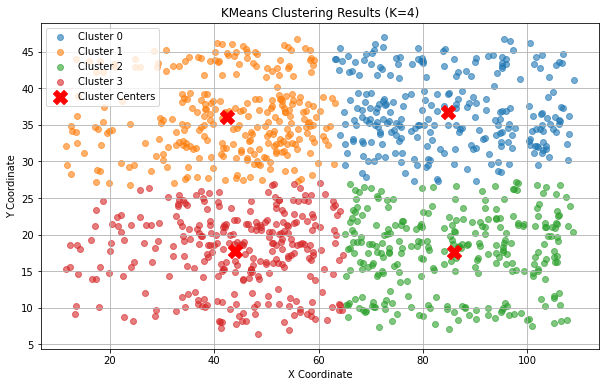

In [82]:
# Step 5: Output clusters for analysis
print(data[['gameId', 'playId', 'cluster']])

# Step 6: Plotting the individual clustered data points
plt.figure(figsize=(10, 6))

# Plot each cluster with a unique color
for cluster in range(optimal_k):
    plt.scatter(data[data['cluster'] == cluster]['x'],
                data[data['cluster'] == cluster]['y'],
                label=f'Cluster {cluster}', alpha=0.6)

# Optional: Plot cluster centers
centers = kmeans.cluster_centers_
# Since centers are in scaled space, we need to inverse transform them to get back to original scale
original_centers = scaler.inverse_transform(centers)
plt.scatter(original_centers[:, 0], original_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Final plot settings
plt.title(f'KMeans Clustering Results (K={optimal_k})')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

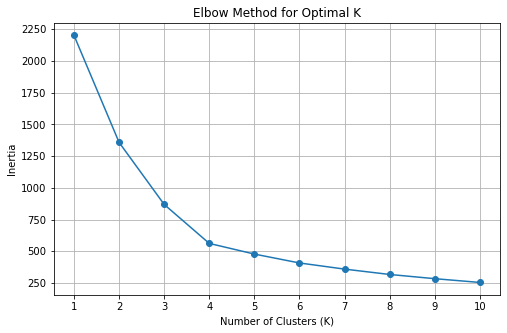

In [75]:
inertia = []
k_values = range(1, 11)  # Test K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure ticks match the k values
plt.grid(True)
plt.show()